# Visualizing Chipotle's Data

Check out [Chipotle's Visualization Exercises Video Tutorial](https://youtu.be/BLD2mAB3kaw) to watch a data scientist go through the exercises

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

In [43]:
link = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

### Step 3. Assign it to a variable called chipo.

In [44]:
chipo = pd.read_csv(link,sep='\t')

### Step 4. See the first 10 entries

In [45]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

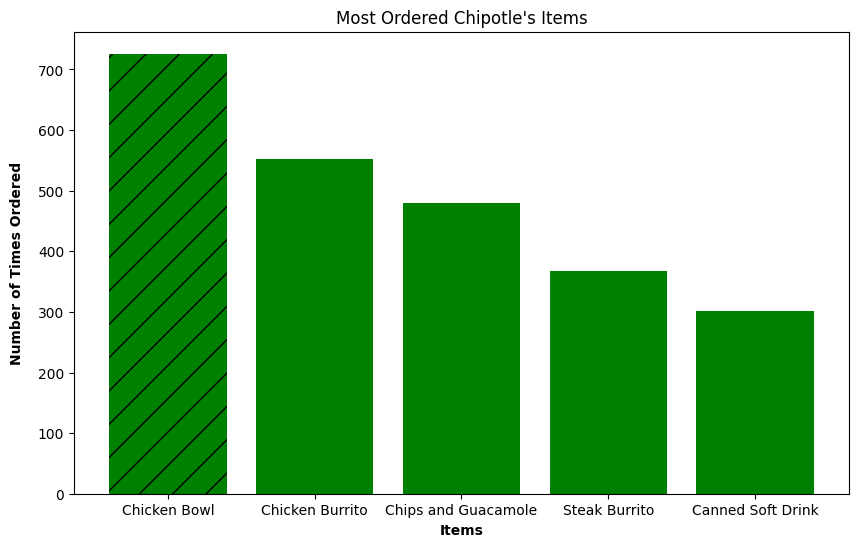

In [52]:
plt.figure(figsize=(10,6))
val = chipo.item_name.value_counts().head()
plt.bar(val.index,val.values,color='green')[0].set_hatch('/')
plt.xlabel("Items",weight='bold')
plt.ylabel('Number of Times Ordered',weight='bold',labelpad=10)
plt.title("Most Ordered Chipotle's Items")
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [47]:
def fun(x):
  return x.replace('$','')

In [48]:

chipo['item_price'] = chipo['item_price'].apply(fun).astype(float)


In [49]:
g = chipo.groupby('order_id',)

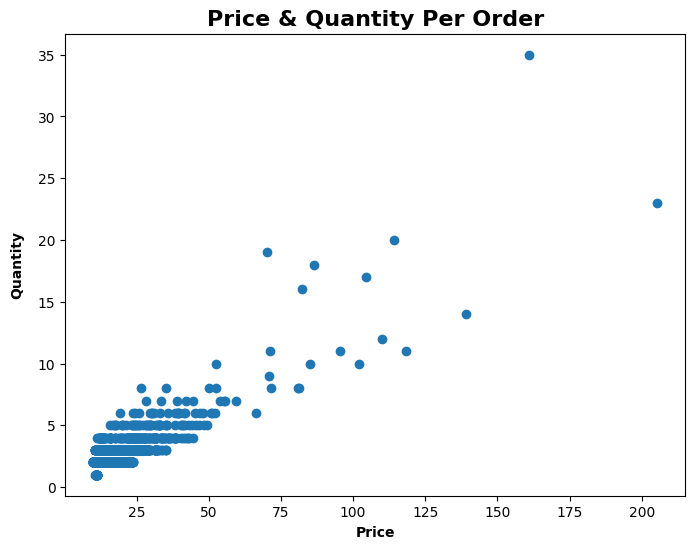

In [50]:
plt.figure(figsize=(8,6))
plt.title('Price & Quantity Per Order',fontdict={'size':16,'weight':'bold'})
plt.scatter(g['item_price'].sum(),g['quantity'].sum())
plt.xlabel("Price",weight='bold')
plt.ylabel("Quantity",weight='bold',labelpad=10)
plt.show()

### BONUS: Create a question and a graph to answer your own question.

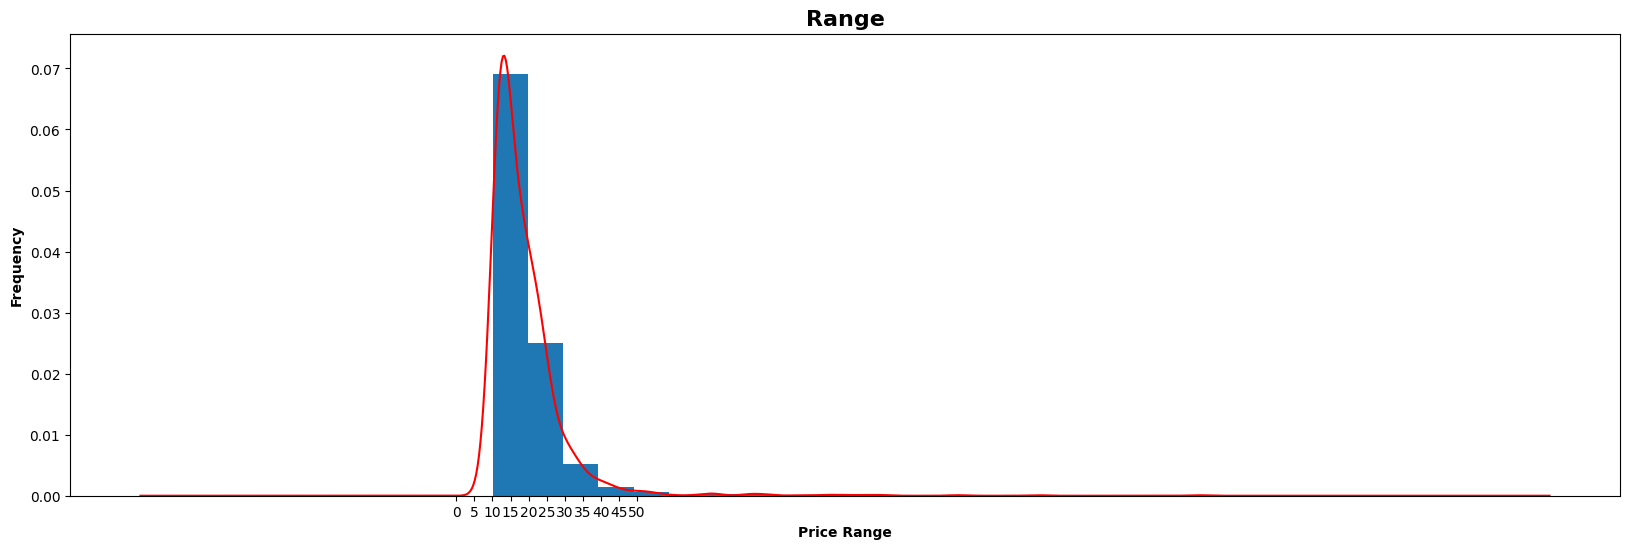

In [51]:
# Ranges of Price
plt.figure(figsize=(20,6))
plt.title("Range",fontdict={'size':16,'weight':'bold'})
plt.hist(g['item_price'].sum(),bins=20,density=True)
g['item_price'].sum().plot(kind='kde',color='red')
plt.xlabel('Price Range',weight='bold')
plt.ylabel('Frequency',weight='bold')
plt.xticks(np.arange(0,55,5))
plt.show()